In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)


In [2]:
pd.options.display.notebook_repr_html = False

In [3]:
%matplotlib inline

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [6]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()


In [7]:
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [8]:
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

years = np.array([2005,2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [10]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [11]:

df.groupby(['key1','key2']).mean()

              data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [12]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [13]:
for name, group in df.groupby('key1'):
    print (name)
    print (group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [14]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print ((k1, k2))
    print (group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [15]:
list(df.groupby(['key1', 'key2']))

[(('a', 'one'),       data1     data2 key1 key2
  0 -0.204708  1.393406    a  one
  4  1.965781  1.246435    a  one),
 (('a', 'two'),       data1     data2 key1 key2
  1  0.478943  0.092908    a  two),
 (('b', 'one'),       data1     data2 key1 key2
  2 -0.519439  0.281746    b  one),
 (('b', 'two'),      data1     data2 key1 key2
  3 -0.55573  0.769023    b  two)]

In [16]:
pieces = dict(list(df.groupby('key1')))

In [17]:
pieces['a']

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one

In [18]:
df.groupby('key1')['data1']


In [19]:
list(df.groupby('key1')[['data2']])

[('a',       data1     data2 key1 key2
  0 -0.204708  1.393406    a  one
  1  0.478943  0.092908    a  two
  4  1.965781  1.246435    a  one), ('b',       data1     data2 key1 key2
  2 -0.519439  0.281746    b  one
  3 -0.555730  0.769023    b  two)]

In [20]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [21]:
grouped = df.groupby(df.dtypes, axis = 1)

dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [22]:
df.dtypes.T.name = ''

In [23]:
list(df.T.join(DataFrame({'type':df.dtypes.T}), how = 'left').groupby('type'))

[(dtype('float64'),
                0          1         2         3        4     type
  data1 -0.204708   0.478943 -0.519439  -0.55573  1.96578  float64
  data2   1.39341  0.0929079  0.281746  0.769023  1.24643  float64),
 (dtype('O'),         0    1    2    3    4    type
  key1    a    a    b    b    a  object
  key2  one  two  one  two  one  object)]

In [24]:
grouped = df.groupby(df.dtypes, axis = 1)

In [25]:
list(grouped)

[(dtype('float64'),       data1     data2
  0 -0.204708  1.393406
  1  0.478943  0.092908
  2 -0.519439  0.281746
  3 -0.555730  0.769023
  4  1.965781  1.246435), (dtype('O'),   key1 key2
  0    a  one
  1    a  two
  2    b  one
  3    b  two
  4    a  one)]

In [26]:
#Selecting a Group and take Column <-> Column, Grouping.

df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key2'])


In [27]:
df.groupby(['key1','key2'])[['data2']].mean().unstack()


         data2          
key2       one       two
key1                    
a     1.319920  0.092908
b     0.281746  0.769023

In [28]:
s_grouped = df.groupby(['key1','key2'])['data2']

In [29]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

In [30]:
s_grouped

In [31]:
df.groupby(['key1','key2'])[['data2']]

In [32]:
people = DataFrame(np.random.randn(5,5), columns = ['a','b','c','d','e'], index = ['Joe','Steve','Wes','Jim','Travis'])

people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741  0.476985  3.248944 -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [33]:
people.loc[2:3, ['b','c']] = np.nan

In [34]:
people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [35]:
#a,b,e -> 'red'
#c, d -> 'blue'
# groupby , form of key should be columnname of dataframe, Series mapper
mapping = {'a':'red', 'b':'red', 'c':'blue','d':'blue','e':'red','f':'orange'}

by_column = people.groupby(mapping, axis = 1)

by_column.sum()

            blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [36]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [37]:
people.groupby(map_series, axis = 1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

In [38]:
people.groupby(len).sum()

          a         b         c         d         e
3  0.591569 -0.993608  0.798764 -0.791374  2.119639
5  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [39]:
people.groupby(map_series)

In [40]:
by_column = people.groupby(Series(mapping), axis = 1)

In [41]:
by_column.sum()

            blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [42]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [43]:
people.groupby(map_series, axis =1 ).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

In [44]:
by_column.sum()

            blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [45]:
Series(mapping)

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [46]:
people.groupby(map_series, axis = 1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

In [47]:
#pass in index value as input
people.groupby(len).sum()

          a         b         c         d         e
3  0.591569 -0.993608  0.798764 -0.791374  2.119639
5  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [48]:
people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [49]:
key_list = ['one','one','one','two','two']

people.groupby([len, key_list]).min()



              a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [50]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names = ['cty','tenor'])

columns

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

In [51]:
hier_df = DataFrame(np.random.randn(4,5), columns=columns)

In [52]:
list(hier_df.groupby(columns, axis = 1))

[(('JP', 1), cty          JP
  tenor         1
  0     -1.063512
  1     -0.970736
  2      0.331286
  3      1.004812), (('JP', 3), cty          JP
  tenor         3
  0      0.332883
  1     -1.307030
  2      1.349742
  3      1.327195), (('US', 1), cty          US
  tenor         1
  0      0.560145
  1     -2.359419
  2      0.286350
  3      0.069877), (('US', 3), cty          US
  tenor         3
  0     -1.265934
  1     -0.199543
  2      0.377984
  3      0.246674), (('US', 5), cty          US
  tenor         5
  0      0.119827
  1     -1.541996
  2     -0.753887
  3     -0.011862)]

In [53]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [54]:
#Not by Label Value, by level label.

hier_df.groupby(level = 'cty', axis = 1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

In [55]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [56]:
def peak_to_peak(arr):
    return arr.max() - arr.min()


In [57]:
grouped.agg(peak_to_peak)

         data1     data2
key1                    
a     2.170488  1.300498
b     0.036292  0.487276

In [58]:
grouped.describe()

     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.746672  1.109736 -0.204708  0.137118  0.478943  1.222362   
b      2.0 -0.537585  0.025662 -0.555730 -0.546657 -0.537585 -0.528512   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.965781   3.0  0.910916  0.712217  0.092908  0.669671  1.246435   
b    -0.519439   2.0  0.525384  0.344556  0.281746  0.403565  0.525384   

                          
           75%       max  
key1                      
a     1.319920  1.393406  
b     0.647203  0.769023  

In [59]:
#count, sum, mean, median, std, var, min,max, prod, first, last

tips = pd.read_csv('./pydata-book/ch08/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [60]:
tips.head()

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808

In [61]:
tips.loc[:6,'tip_pct']

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
5    0.186240
6    0.228050
Name: tip_pct, dtype: float64

In [62]:
grouped = tips.groupby(['sex','smoker'])

In [63]:
grouped_pct = grouped['tip_pct']

grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [64]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [65]:
functions = ['count','mean', 'max']

result = grouped['tip_pct','total_bill'].agg(functions)

In [66]:
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [67]:
grouped = tips.groupby(['sex','smoker'])

grouped_pct = grouped['tip_pct']

grouped_pct.agg('mean')

grouped_pct.agg(['mean','std',peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [68]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])


                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [69]:
grouped_pct.agg([('summation','sum')])

               summation
sex    smoker           
Female No       8.473732
       Yes      6.010962
Male   No      15.584865
       Yes      9.166271

In [70]:
functions = ['count','mean','max']

result = grouped['tip_pct', 'total_bill'].agg(functions)

In [71]:
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [72]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [73]:
ftuples = [('Durchschnitt','mean'), ('Abweichung',np.var)]

grouped['tip_pct','total_bill'].agg(ftuples)

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [74]:
# ('name',{'col':'function', }, )
grouped.agg({'tip':np.max, 'size':'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [75]:
grouped.agg({'tip_pct': ['min','max','mean','std'], 'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [76]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [77]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [78]:
df.groupby('key1').agg('mean')

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [79]:
df.groupby('key1').agg(['mean','sum'])

         data1               data2          
          mean       sum      mean       sum
key1                                        
a     0.746672  2.240016  0.910916  2.732748
b    -0.537585 -1.075169  0.525384  1.050769

In [80]:
df.groupby('key1').agg([('mean','mean')])

         data1     data2
          mean      mean
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [81]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

      data1     data2 key1 key2  mean_data1  mean_data2
0 -0.204708  1.393406    a  one    0.746672    0.910916
1  0.478943  0.092908    a  two    0.746672    0.910916
4  1.965781  1.246435    a  one    0.746672    0.910916
2 -0.519439  0.281746    b  one   -0.537585    0.525384
3 -0.555730  0.769023    b  two   -0.537585    0.525384

In [82]:
key = ['one','two','one','two','one']
people.groupby(key).mean()

            a         b         c         d         e
one -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
two  0.505275 -0.849512  0.075965  0.834983  0.452620

In [83]:
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Steve   0.505275 -0.849512  0.075965  0.834983  0.452620
Wes    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Jim     0.505275 -0.849512  0.075965  0.834983  0.452620
Travis -0.082032 -1.063687 -1.047620 -0.884358 -0.028309

In [84]:
df

      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two
4  1.965781  1.246435    a  one

In [85]:
grpstat = df.groupby('key1').agg(['mean','sum'])

In [86]:
grpstat

         data1               data2          
          mean       sum      mean       sum
key1                                        
a     0.746672  2.240016  0.910916  2.732748
b    -0.537585 -1.075169  0.525384  1.050769

In [87]:
pd.merge(df, grpstat, left_on='key1', right_index=True)

/home/june/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


      data1     data2 key1 key2  (data1, mean)  (data1, sum)  (data2, mean)  \
0 -0.204708  1.393406    a  one       0.746672      2.240016       0.910916   
1  0.478943  0.092908    a  two       0.746672      2.240016       0.910916   
4  1.965781  1.246435    a  one       0.746672      2.240016       0.910916   
2 -0.519439  0.281746    b  one      -0.537585     -1.075169       0.525384   
3 -0.555730  0.769023    b  two      -0.537585     -1.075169       0.525384   

   (data2, sum)  
0      2.732748  
1      2.732748  
4      2.732748  
2      1.050769  
3      1.050769  

In [88]:
people.groupby(key).mean()

            a         b         c         d         e
one -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
two  0.505275 -0.849512  0.075965  0.834983  0.452620

In [89]:
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Steve   0.505275 -0.849512  0.075965  0.834983  0.452620
Wes    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Jim     0.505275 -0.849512  0.075965  0.834983  0.452620
Travis -0.082032 -1.063687 -1.047620 -0.884358 -0.028309

In [90]:
people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [91]:
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)

demeaned

               a         b         c         d         e
Joe     1.089221 -0.232534  1.322612  1.113271  1.381226
Steve   0.381154 -1.152125 -0.447807  0.834043 -0.891190
Wes    -0.457709       NaN       NaN -0.136869 -0.548778
Jim    -0.381154  1.152125  0.447807 -0.834043  0.891190
Travis -0.631512  0.232534 -1.322612 -0.976402 -0.832448

In [92]:
demeaned.groupby(key).mean()

                a             b    c             d    e
one  0.000000e+00 -1.110223e-16  0.0  7.401487e-17  0.0
two -2.775558e-17  0.000000e+00  0.0  0.000000e+00  0.0

In [93]:
demeaned.mean(axis=0)

a    0.000000e+00
b   -5.551115e-17
c    0.000000e+00
d    4.440892e-17
e    0.000000e+00
dtype: float64

In [94]:
def top(df, n=5, column = 'tip_pct'):
    return df.sort_index(by=column)[-n:]

top(tips, n=6)

tips.groupby('smoker').apply(top)

/home/june/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [95]:
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

/home/june/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [96]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [97]:
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [98]:
result.stack()

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [99]:
result.unstack().unstack('smoker')

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [100]:
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [101]:
f = lambda x: x.describe()
grouped.apply(f)

                     total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.

In [102]:
tips.groupby('smoker',group_keys = True).apply(top)

/home/june/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [103]:
tips.groupby('smoker',group_keys = False).apply(top)

/home/june/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [104]:
frame = DataFrame({'data1' : np.random.randn(1000),
                  'data2' : np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)

In [105]:
frame.head()

      data1     data2
0 -0.919262  1.165148
1 -1.549106 -0.621249
2  0.022185 -0.799318
3  0.758363  0.777233
4 -0.660524 -0.612905

In [106]:
factor.head()

0     (-1.23, 0.489]
1    (-2.956, -1.23]
2     (-1.23, 0.489]
3     (0.489, 2.208]
4     (-1.23, 0.489]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [107]:
#Groupping Continuous Values, pd.cut
def get_stats(group):
    return {'min' : group.min(), 'max' : group.max(),
           'count' : group.count(), 'mean' : group.mean()}

grouped = frame.data2.groupby(factor)

In [108]:
grouped

In [109]:
grouped.apply(get_stats)

data1                 
(-2.956, -1.23]  count     95.000000
                 max        1.670835
                 mean      -0.039521
                 min       -3.399312
(-1.23, 0.489]   count    598.000000
                 max        3.260383
                 mean      -0.002051
                 min       -2.989741
(0.489, 2.208]   count    297.000000
                 max        2.954439
                 mean       0.081822
                 min       -3.745356
(2.208, 3.928]   count     10.000000
                 max        1.765640
                 mean       0.024750
                 min       -1.929776
Name: data2, dtype: float64

In [110]:
factor[:10]

0     (-1.23, 0.489]
1    (-2.956, -1.23]
2     (-1.23, 0.489]
3     (0.489, 2.208]
4     (-1.23, 0.489]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8     (0.489, 2.208]
9     (0.489, 2.208]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [111]:
grouping = pd.qcut(frame.data1, 10, labels = False)

In [112]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  1.670835 -0.049902 -3.399312
1      100.0  2.628441  0.030989 -1.950098
2      100.0  2.527939 -0.067179 -2.925113
3      100.0  3.260383  0.065713 -2.315555
4      100.0  2.074345 -0.111653 -2.047939
5      100.0  2.184810  0.052130 -2.989741
6      100.0  2.458842 -0.021489 -2.223506
7      100.0  2.954439 -0.026459 -3.056990
8      100.0  2.735527  0.103406 -3.745356
9      100.0  2.377020  0.220122 -2.064111

In [113]:
pd.qcut(frame.data1, 10, labels = False).head()

0    1
1    0
2    5
3    7
4    2
Name: data1, dtype: int64

In [114]:
pd.cut(frame.data1,10).head()

0    (-1.574, -0.886]
1    (-1.574, -0.886]
2     (-0.199, 0.489]
3      (0.489, 1.177]
4    (-0.886, -0.199]
Name: data1, dtype: category
Categories (10, interval[float64]): [(-2.956, -2.262] < (-2.262, -1.574] < (-1.574, -0.886] < (-0.886, -0.199] ... (1.177, 1.864] < (1.864, 2.552] < (2.552, 3.24] < (3.24, 3.928]]

In [115]:
grouping = pd.qcut(frame.data1, 10, labels = False)

In [116]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  1.670835 -0.049902 -3.399312
1      100.0  2.628441  0.030989 -1.950098
2      100.0  2.527939 -0.067179 -2.925113
3      100.0  3.260383  0.065713 -2.315555
4      100.0  2.074345 -0.111653 -2.047939
5      100.0  2.184810  0.052130 -2.989741
6      100.0  2.458842 -0.021489 -2.223506
7      100.0  2.954439 -0.026459 -3.056990
8      100.0  2.735527  0.103406 -3.745356
9      100.0  2.377020  0.220122 -2.064111

In [117]:
s = Series(np.random.randn(6))
s[::2] = np.nan

s

0         NaN
1   -0.125921
2         NaN
3   -0.884475
4         NaN
5    0.227290
dtype: float64

In [118]:
s.fillna(s.mean())

0   -0.261035
1   -0.125921
2   -0.261035
3   -0.884475
4   -0.261035
5    0.227290
dtype: float64

In [119]:
state = ['Ohio', 'New York', 'Vermont', 'Florida',
         'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

data = Series(np.random.randn(8), index = state)

data[['Vermont', 'Nevada', 'Idaho']] = np.nan

data


Ohio          0.922264
New York     -2.153545
Vermont            NaN
Florida      -0.375842
Oregon        0.329939
Nevada             NaN
California    1.105913
Idaho              NaN
dtype: float64

In [120]:
data.groupby(group_key).mean()

East   -0.535707
West    0.717926
dtype: float64

In [121]:
fill_mean = lambda g: g.fillna(g.mean())

#group별 fillna(.~)
data.groupby(group_key).apply(fill_mean)

Ohio          0.922264
New York     -2.153545
Vermont      -0.535707
Florida      -0.375842
Oregon        0.329939
Nevada        0.717926
California    1.105913
Idaho         0.717926
dtype: float64

In [122]:
fill_values = {'East' : 0.5, 'West' : -1}

fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.922264
New York     -2.153545
Vermont       0.500000
Florida      -0.375842
Oregon        0.329939
Nevada       -1.000000
California    1.105913
Idaho        -1.000000
dtype: float64

In [123]:
fill_values


{'East': 0.5, 'West': -1}

In [124]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4

In [126]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
suits = ['H', 'S', 'C', 'D']

card_val = (list(range(1,11)) + [10] * 3) * 4

base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']

cards = []

for suit in ['H', 'S', 'C','D']:
    cards.extend(str(num) + suit for num in base_names)
    
deck = Series(card_val, index = cards)



In [127]:
#Series corresponding to requested indices
def draw(deck, n = 5):
    return deck.take(np.random.permutation(len(deck)))[:n]

In [128]:
draw(deck)

AD     1
8C     8
5H     5
KC    10
2C     2
dtype: int64

In [129]:
get_suit = lambda card: card[-1] # last letter is suit

In [130]:
cards[-1]

'QD'

In [131]:
deck.groupby(get_suit)

In [132]:
deck.take(list(range(1,3)))

2H    2
3H    3
dtype: int64

In [133]:
get_suit = lambda card: card[-1]

In [134]:
deck.index.map(get_suit)

Index(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
      dtype='object')

In [135]:
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

2C     2
3C     3
KD    10
8D     8
KH    10
3H     3
2S     2
4S     4
dtype: int64

In [136]:
deck.groupby(deck.index.map(get_suit), group_keys = False).apply(draw, n = 2)

KC    10
JC    10
AD     1
5D     5
5H     5
6H     6
7S     7
KS    10
dtype: int64

In [137]:
df = DataFrame({'category' : ['a', 'a', 'a', 'a', 'b', 'b','b', 'b'],
               'data' : np.random.randn(8),
               'weights' : np.random.rand(8)})

In [138]:
df

  category      data   weights
0        a  1.561587  0.957515
1        a  1.219984  0.347267
2        a -0.482239  0.581362
3        a  0.315667  0.217091
4        b -0.047852  0.894406
5        b -0.454145  0.918564
6        b -0.556774  0.277825
7        b  0.253321  0.955905

In [139]:
grouped = df.groupby('category').apply((lambda g : np.average(g['data'], weights=g['weights'])))

grouped

category
a    0.811643
b   -0.122262
dtype: float64

In [140]:
grouped = df.groupby('category')

get_wavg = lambda g: np.average(g['data'], weights = g['weights'])
grouped.apply(get_wavg)

category
a    0.811643
b   -0.122262
dtype: float64

In [141]:
close_px = pd.read_csv('./pydata-book/ch09/stock_px.csv', parse_dates = True, index_col = 0)

In [142]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [143]:
close_px.head()

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93

In [144]:
rets = close_px.pct_change().dropna()

In [145]:
rets.head()

                AAPL      MSFT       XOM       SPX
2003-01-03  0.006757  0.001421  0.000684 -0.000484
2003-01-06  0.000000  0.017975  0.024624  0.022474
2003-01-07 -0.002685  0.019052 -0.033712 -0.006545
2003-01-08 -0.020188 -0.028272 -0.004145 -0.014086
2003-01-09  0.008242  0.029094  0.021159  0.019386

In [146]:
-close_px.diff(-1)/close_px).dropna()

SyntaxError: invalid syntax (<ipython-input-146-4429d3b03f63>, line 1)

In [147]:
by_year = rets.groupby(lambda x: x.year)

In [148]:
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [149]:
rets.groupby(rets.index.year).apply(lambda x: x.corrwith(x))

      AAPL  MSFT  XOM  SPX
2003   1.0   1.0  1.0  1.0
2004   1.0   1.0  1.0  1.0
2005   1.0   1.0  1.0  1.0
2006   1.0   1.0  1.0  1.0
2007   1.0   1.0  1.0  1.0
2008   1.0   1.0  1.0  1.0
2009   1.0   1.0  1.0  1.0
2010   1.0   1.0  1.0  1.0
2011   1.0   1.0  1.0  1.0

In [150]:
rets.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', length=2213)

In [151]:
rets.corrwith(rets['AAPL'])

AAPL    1.000000
MSFT    0.444697
XOM     0.385927
SPX     0.564474
dtype: float64

In [152]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [153]:
rets['AAPL'].corr(rets['MSFT'])

0.44469678861732237

In [154]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

by_year.apply(regress, 'AAPL', ['SPX'])

/home/june/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


           SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514

In [155]:
tips.groupby(['sex', 'smoker'])

In [156]:
tips.pivot_table(index = ['sex','smoker']) #Default Aggregation type mean

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [157]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'])

                 size   tip_pct
sex    day                     
Female Fri   2.111111  0.199388
       Sat   2.250000  0.156470
       Sun   2.944444  0.181569
       Thur  2.468750  0.157525
Male   Fri   2.100000  0.143385
       Sat   2.644068  0.151577
       Sun   2.810345  0.162344
       Thur  2.433333  0.165276

In [158]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'], columns = 'smoker')

                 size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [159]:
#If the columns are specified.
tips.pivot_table(['tip_pct','size'],index=['sex','day'], columns = 'smoker', margins=True)

                 size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [160]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'], margins=True)

                 size   tip_pct
sex    day                     
Female Fri   2.111111  0.199388
       Sat   2.250000  0.156470
       Sun   2.944444  0.181569
       Thur  2.468750  0.157525
Male   Fri   2.100000  0.143385
       Sat   2.644068  0.151577
       Sun   2.810345  0.162344
       Thur  2.433333  0.165276
All          2.569672  0.160803

In [161]:
#aggfunc -> mean by default
tips.pivot_table(['tip_pct'], index = ['sex','smoker'],columns = 'day', aggfunc = len, margins = True)

              tip_pct                         
day               Fri   Sat   Sun  Thur    All
sex    smoker                                 
Female No         2.0  13.0  14.0  25.0   54.0
       Yes        7.0  15.0   4.0   7.0   33.0
Male   No         2.0  32.0  43.0  20.0   97.0
       Yes        8.0  27.0  15.0  10.0   60.0
All              19.0  87.0  76.0  62.0  244.0

In [162]:
tips.pivot

<bound method DataFrame.pivot of      total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00    Male

In [163]:
tips.pivot_table('size', index = ['time','sex','smoker'], columns='day', aggfunc='sum', fill_value = 0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

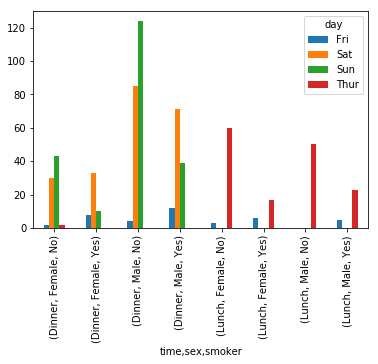

In [164]:
tips.pivot_table('size', index = ['time','sex','smoker'],
                columns = 'day', aggfunc = 'sum',fill_value = 0).plot(kind = 'bar')

In [165]:
try:
    from StringIO import StringIO
except:
    from io import StringIO
    
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [166]:
data

   Sample  Gender    Handedness
0       1  Female  Right-handed
1       2    Male   Left-handed
2       3  Female  Right-handed
3       4    Male  Right-handed
4       5    Male   Left-handed
5       6    Male  Right-handed
6       7  Female  Right-handed
7       8  Female   Left-handed
8       9    Male  Right-handed
9      10  Female  Right-handed

In [167]:
pd.crosstab(data.Gender, data.Handedness, margins = True)

Handedness  Left-handed  Right-handed  All
Gender                                    
Female                1             4    5
Male                  2             3    5
All                   3             7   10

In [168]:
#Only Count Existence, Contingency Table
pd.crosstab([tips.time, tips.day], tips.smoker, margins= True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [169]:
#
tips.pivot_table('size', index = ['time', 'day'], columns=['smoker'], aggfunc='count', margins = True)

smoker          No   Yes    All
time   day                     
Dinner Fri     3.0   9.0   12.0
       Sat    45.0  42.0   87.0
       Sun    57.0  19.0   76.0
       Thur    1.0   NaN    1.0
Lunch  Fri     1.0   6.0    7.0
       Thur   44.0  17.0   61.0
All          151.0  93.0  244.0

In [170]:
fec = pd.read_csv('./pydata-book/ch09/P00000001-ALL.csv')
fec.info()

/home/june/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [171]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [172]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [173]:
fec.head()

     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st   contbr_zip        contbr_employer  \
0              MOBILE        AL   3.6601e+08                RETIRED   
1              MOBILE        AL   3.6601e+08                RETIRED   
2              LANETT        AL  3.68633e+08  INFORMATION REQUESTED   
3             PIGGOTT        AR  7.24548e+08                   NONE   
4  HOT SPRINGS NATION        AR  7.19016e+08                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0                RETIRED              250.0        20-JUN-11          NaN   
1               

In [174]:
unique_cands = fec.cand_nm.unique()

In [175]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [176]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


In [177]:
fec.cand_nm[123456:123461].map(parties).value_counts()

Democrat    5
Name: cand_nm, dtype: int64

In [178]:
fec['party'] = fec.cand_nm.map(parties)

In [179]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [180]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [181]:
fec_pos = fec[fec.contb_receipt_amt >0]

fec_pos.head()

     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st   contbr_zip        contbr_employer  \
0              MOBILE        AL   3.6601e+08                RETIRED   
1              MOBILE        AL   3.6601e+08                RETIRED   
2              LANETT        AL  3.68633e+08  INFORMATION REQUESTED   
3             PIGGOTT        AR  7.24548e+08                   NONE   
4  HOT SPRINGS NATION        AR  7.19016e+08                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0                RETIRED              250.0        20-JUN-11          NaN   
1               

In [182]:
#cand_nm contain Obama or Romney

fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [183]:
fec_mrbo.head()

       cmte_id    cand_id       cand_nm           contbr_nm contbr_city  \
411  C00431171  P80003353  Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
412  C00431171  P80003353  Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
413  C00431171  P80003353  Romney, Mitt    CARLSEN, RICHARD         APO   
414  C00431171  P80003353  Romney, Mitt      DELUCA, PIERRE         APO   
415  C00431171  P80003353  Romney, Mitt    SARGENT, MICHAEL         APO   

    contbr_st   contbr_zip                   contbr_employer  \
411        AA   3.4023e+08                     US GOVERNMENT   
412        AA   3.4023e+08                     US GOVERNMENT   
413        AE    9.128e+07       DEFENSE INTELLIGENCE AGENCY   
414        AE    9.128e+07                             CISCO   
415        AE  9.01201e+07  RAYTHEON TECHNICAL SERVICES CORP   

             contbr_occupation  contb_receipt_amt contb_receipt_dt  \
411    FOREIGN SERVICE OFFICER               25.0        01-FEB-12   
412    FOREIGN SERVICE O

In [184]:
fec_pos.contbr_occupation.value_counts()[:10]
#Categorical alignement

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [185]:
#Occupation Mapping.
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O' : 'CEO'
}

f = lambda x : occ_mapping.get(x, x) #Get from the dict, otherwise return as it is.
#Emplolyer Mapping
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

f = lambda x : emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)


In [186]:
by_occupation = fec_pos.pivot_table('contb_receipt_amt',
               index = 'contbr_occupation',
               columns = 'party', aggfunc = 'sum')

#over_2mm = by_occupation[by_occupation.sum(1)]

In [187]:
over2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [188]:
over2mm

party                                      Democrat    Republican
contbr_occupation                                                
ATTORNEY                                11141982.97  7.477194e+06
C.E.O.                                      1690.00  2.592983e+06
CEO                                      2073284.79  1.618057e+06
CONSULTANT                               2459912.71  2.544725e+06
ENGINEER                                  951525.55  1.818374e+06
EXECUTIVE                                1355161.05  4.138850e+06
HOMEMAKER                                4248875.80  1.363428e+07
INFORMATION REQUESTED                    4866973.96  3.896616e+06
INFORMATION REQUESTED PER BEST EFFORTS          NaN  1.634053e+07
INVESTOR                                  884133.00  2.431769e+06
LAWYER                                   3160478.87  3.912243e+05
MANAGER                                   762883.22  1.444532e+06
OWNER                                    1001567.36  2.408287e+06
PHYSICIAN 

In [189]:
by_occupation.loc['ATTORNEY']

party
Democrat      11141982.97
Republican     7477194.43
Name: ATTORNEY, dtype: float64

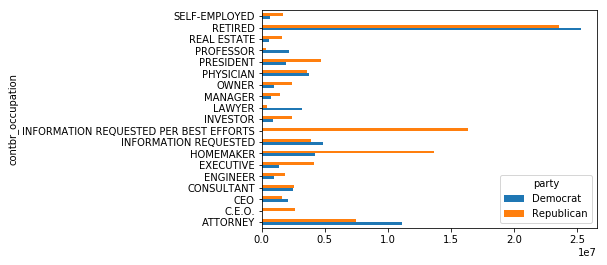

In [190]:
over2mm.plot(kind = 'barh')

In [200]:
def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending = False)[:n]


In [201]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25270507.23
               ATTORNEY                                  11126932.97
               INFORMATION REQUESTED                      4849801.96
               HOMEMAKER                                  4243394.30
               PHYSICIAN                                  3732387.44
               LAWYER                                     3159391.87
               CONSULTANT                                 2459812.71
Romney, Mitt   RETIRED                                   11266949.23
               INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
               HOMEMAKER                                  8037250.86
               ATTORNEY                                   5302578.82
               PRESIDENT                                  2403439.77
               EXECUTIVE                                  2230653.79
               C.E.O.                            

In [202]:
grouped.apply(get_top_amounts, 'contbr_employer', n = 10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22665902.20
               SELF-EMPLOYED                             17038455.96
               NOT EMPLOYED                               8584118.70
               INFORMATION REQUESTED                      5036178.37
               HOMEMAKER                                  2599987.04
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    11827237.12
               RETIRED                                   11264701.35
               HOMEMAKER                                  8037000.86
               SELF-EMPLOYED                     

In [205]:
bins = np.array([pow(10, i) for i in range(8)])
bins


array([       1,       10,      100,     1000,    10000,   100000,
        1000000, 10000000])

In [207]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels
fec_mrbo.contb_receipt_amt.head()

411     25.0
412    110.0
413    250.0
414     30.0
415    100.0
Name: contb_receipt_amt, dtype: float64

In [209]:
labels.head()

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (7, interval[int64]): [(1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [210]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [211]:
grouped

In [217]:
grouped.size() #Comput Group size, make count()

cand_nm        contb_receipt_amt  
Obama, Barack  (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64

In [219]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [220]:
grouped.contb_receipt_amt.sum().unstack(1)

contb_receipt_amt    (1, 10]    (10, 100]  (100, 1000]  (1000, 10000]  \
cand_nm                                                                 
Obama, Barack      337267.62  20288981.41  54798531.46    51753705.67   
Romney, Mitt        29819.66   1987783.76  22363381.69    63942145.42   

contb_receipt_amt  (10000, 100000]  (100000, 1000000]  (1000000, 10000000]  
cand_nm                                                                     
Obama, Barack              59100.0         1490683.08           7148839.76  
Romney, Mitt               12700.0                NaN                  NaN  

In [224]:
#Get total by row
#divide by by columnwise
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)

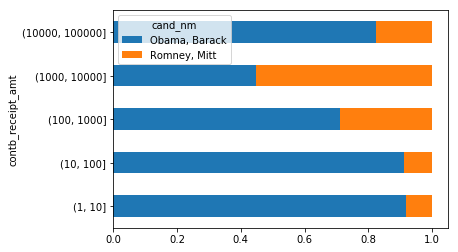

In [229]:
normed_sums[:-2].plot(kind = 'barh', stacked =True)

In [230]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [232]:
totals_ample = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              49505.00        135.00
AB               2048.00          0.00
AE              42973.75       5680.00
AK             275353.15      86204.24
AL             537835.48     504882.08
AP              37130.50       1655.00
AR             324802.28     105351.50
AS               2955.00          0.00
AZ            1484241.84    1850484.23
BR               -500.00          0.00

In [233]:
percent = totals.div(totals.sum(axis= 1), axis = 0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              0.997280      0.002720
AB              1.000000      0.000000
AE              0.883257      0.116743
AK              0.761575      0.238425
AL              0.515802      0.484198
AP              0.957329      0.042671
AR              0.755084      0.244916
AS              1.000000      0.000000
AZ              0.445087      0.554913
BR              1.000000     -0.000000

In [243]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2017, 7, 17, 16, 57, 36, 805953)

In [248]:
datetime(2014, 7, 31, 0, 2, 55, 874995)

datetime.datetime(2014, 7, 31, 0, 2, 55, 874995)

In [245]:
now.year, now.month, now.day

(2017, 7, 17)

In [242]:
now

datetime.datetime(2017, 7, 17, 16, 56, 8, 227552)